Dimensionality reduction is a necessary step prior to data segmentation.

### First we will combine PCA and K-Means for before2015 dataset

#### Importing libraries

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
%store -r before2015 
#accesing the datset made in earlier codes

In [3]:
before2015.head() #seeing the entries

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
976,1,2015-12-31 08:20:00,318,7,1,318,0,0,0,0,0,2015,12,3,8
977,1,2015-12-29 06:29:00,370,16,1,370,0,0,0,0,0,2015,12,1,6
978,1,2015-12-28 03:55:00,58,3,0,58,0,0,0,0,0,2015,12,0,3
979,1,2015-12-28 03:54:00,45,0,0,45,0,0,0,0,0,2015,12,0,3
980,1,2015-12-28 03:40:00,69,0,0,69,0,0,0,0,0,2015,12,0,3


In [4]:
before2015.shape

(1659, 15)

#### Visualize raw data

Text(0.5, 1.0, 'Visualization of raw data')

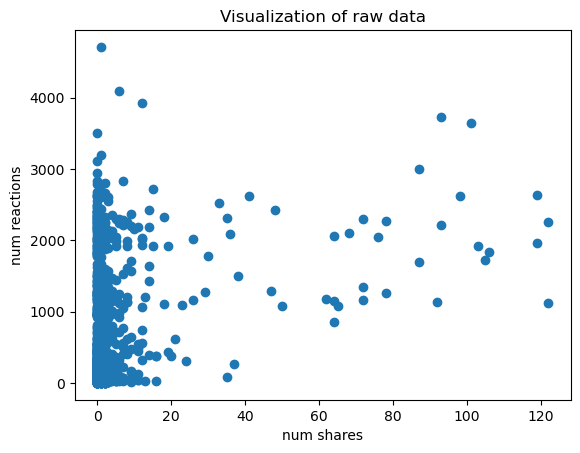

In [5]:
#Plotting 1659 entries, scattered across num shares and num reactions 
plt.scatter(before2015.loc[:,"num_shares"],before2015.loc[:,"num_reactions"]) 
plt.xlabel("num shares")
plt.ylabel("num reactions")
plt.title("Visualization of raw data")

In [6]:
%store -r before2015_scaled 
#we had already standarized the data in PCA code, so we are just acquiring it.

%store -r transformed_before2015
#we had already found the optimal number of components and transformed data in PCA code, so we are just acquiring it.
#transformed_before2015 data has the data transformed using PCA, after selecting two principal components.

#### Finding the optimal number of clusters, using the elbow method.
- K-means doesn’t determine the number of clusters in your solution. 
- In any case, it turns out that we ourselves need to determine the number of clusters in a K-means algorithm.
- Using the approach known as the Elbow method, we make a decision about how many clusters we’d like to keep.

We determine the number of clusters we’d like to keep, from the below graph. The approach consists of looking for a kink or elbow in the graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it is much smoother. In this instance, the kink comes at the 3 clusters mark. So, we’ll be keeping a three-cluster solution.

C:\Users\subhi\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\subhi\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\subhi\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\subhi\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:13

([<matplotlib.axis.XTick at 0x2b8176f6a10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

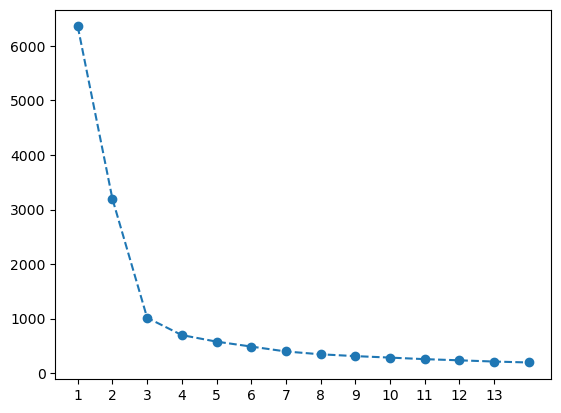

In [7]:
inertia=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,n_init="auto",random_state=1)
    kmeans.fit(transformed_before2015)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,15),inertia,marker='o',linestyle="--")
plt.xticks(range(1,14))

#### K-Means clustering on PCA transformed data

We will be forming a new dataset that will contain the original data, PCA transformed data and the assignal labels to clusters by KMeans.

In [8]:
kmeans_pca=KMeans(n_clusters=3,n_init="auto",random_state=1)
kmeans_pca.fit(transformed_before2015)

C:\Users\subhi\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=1)

In [18]:
#the reset_index function here drops the indexes of the before2015 dataset and new indexes are assigned.
df_segm_pca_kmeans=pd.concat([before2015.reset_index(drop=True),pd.DataFrame(transformed_before2015)],axis=1)
df_segm_pca_kmeans.columns.values[-2:]=['Component1','Component2']
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_
df_segm_pca_kmeans['Segment']=df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third'})
df_segm_pca_kmeans

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour,Component1,Component2,Segment K-means PCA,Segment
0,1,2015-12-31 08:20:00,318,7,1,318,0,0,0,0,0,2015,12,3,8,-0.319338,-0.023621,0,first
1,1,2015-12-29 06:29:00,370,16,1,370,0,0,0,0,0,2015,12,1,6,-0.128677,0.033461,0,first
2,1,2015-12-28 03:55:00,58,3,0,58,0,0,0,0,0,2015,12,0,3,-0.784587,0.208403,0,first
3,1,2015-12-28 03:54:00,45,0,0,45,0,0,0,0,0,2015,12,0,3,-0.841897,0.183822,0,first
4,1,2015-12-28 03:40:00,69,0,0,69,0,0,0,0,0,2015,12,0,3,-0.807317,0.153059,0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1,2012-07-15 03:54:00,19,17,3,19,0,0,0,0,0,2012,7,6,3,-0.543152,0.589597,0,first
1655,1,2012-07-15 03:42:00,12,3,0,12,0,0,0,0,0,2012,7,6,3,-0.850865,0.267365,0,first
1656,1,2012-07-15 03:32:00,14,1,0,14,0,0,0,0,0,2012,7,6,3,-0.873703,0.237305,0,first
1657,1,2012-07-15 02:58:00,14,7,0,14,0,0,0,0,0,2012,7,6,2,-0.796544,0.319794,0,first


#### Visualizing clusters for before2015 dataset.

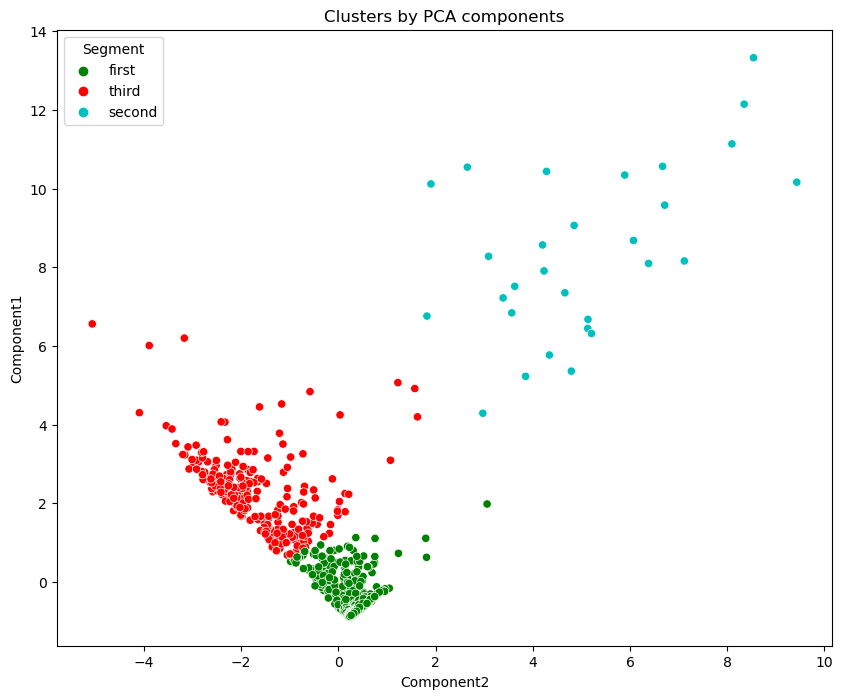

In [23]:
x_axis=df_segm_pca_kmeans['Component2']
y_axis=df_segm_pca_kmeans['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_pca_kmeans['Segment'],palette=['g','r','c'])
plt.title('Clusters by PCA components')
plt.show()

### Next, we will combine PCA and K-Means for after2015 dataset.

In [24]:
%store -r after2015

In [25]:
after2015.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,2,3


In [26]:
after2015.shape

(5340, 15)

#### Visualize raw data

Text(0.5, 1.0, 'Visualization of raw data')

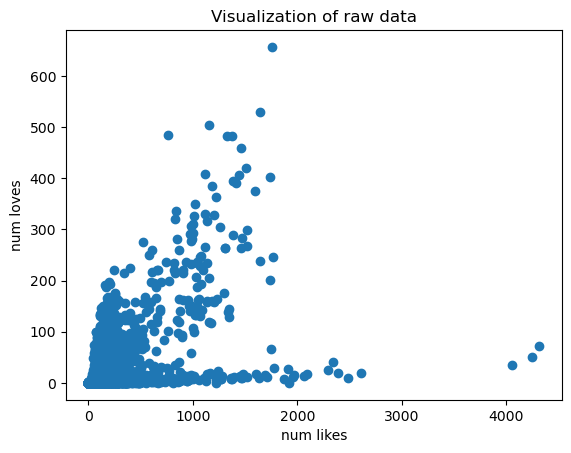

In [28]:
#Plotting 1659 entries, scattered across num shares and num reactions 
plt.scatter(after2015.loc[:,"num_likes"],after2015.loc[:,"num_loves"]) 
plt.xlabel("num likes")
plt.ylabel("num loves")
plt.title("Visualization of raw data")

In [29]:
%store -r after2015_scaled 
#we had already standarized the data in PCA code, so we are just acquiring it.

%store -r transformed_after2015
#we had already found the optimal number of components and transformed data in PCA code, so we are just acquiring it.
#transformed_before2015 data has the data transformed using PCA, after selecting two principal components.

#### Finding the optimal number of clusters, using the elbow method.
- K-means doesn’t determine the number of clusters in your solution. 
- In any case, it turns out that we ourselves need to determine the number of clusters in a K-means algorithm.
- Using the approach known as the Elbow method, we make a decision about how many clusters we’d like to keep.

We determine the number of clusters we’d like to keep, from the below graph. The approach consists of looking for a kink or elbow in the graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it is much smoother. In this instance, the kink comes at the 2 and 9 clusters mark. The 2 cluster mark has the steepest decline. We’ll keep a two-cluster solution.

([<matplotlib.axis.XTick at 0x2b81c7bea40>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

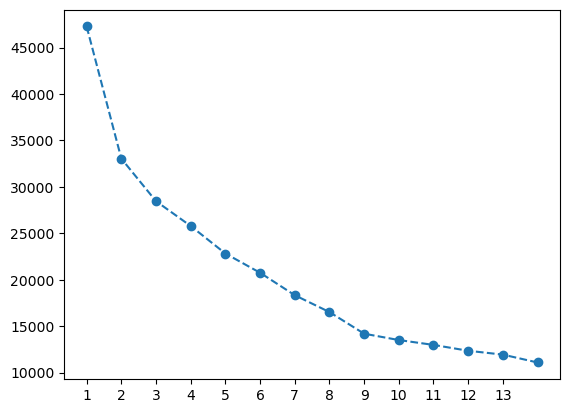

In [31]:
inertia=[]
for i in range(1,15):
    kmeans_after=KMeans(n_clusters=i,n_init="auto",random_state=1)
    kmeans_after.fit(transformed_after2015)
    inertia.append(kmeans_after.inertia_)
plt.plot(range(1,15),inertia,marker='o',linestyle="--")
plt.xticks(range(1,14))

#### K-Means clustering on PCA transformed data

We will be forming a new dataset that will contain the original data, PCA transformed data and the assignal labels to clusters by KMeans.

In [54]:
kmeans_pca_after=KMeans(n_clusters=2,n_init="auto",random_state=1)
kmeans_pca_after.fit(transformed_after2015)

KMeans(n_clusters=2, n_init='auto', random_state=1)

In [55]:
#the reset_index function here drops the indexes of the before2015 dataset and new indexes are assigned.
df_segm_pca_kmeans_after=pd.concat([after2015.reset_index(drop=True),pd.DataFrame(transformed_after2015)],axis=1)
df_segm_pca_kmeans_after.columns.values[-7:]=['Component1','Component2','Component3','Component4','Component5','Component6','Component7']
df_segm_pca_kmeans_after['Segment K-means PCA']=kmeans_pca_after.labels_
df_segm_pca_kmeans_after['Segment']=df_segm_pca_kmeans_after['Segment K-means PCA'].map({0:'first',
                                                                             1:'second',2:'third',3:'fourth'})
df_segm_pca_kmeans_after

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,...,hour,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Segment K-means PCA,Segment
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,...,6,2.377899,0.305597,0.304191,-0.525050,-0.629354,0.058858,-1.177229,1,second
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,...,22,-0.563727,0.353913,0.090716,0.009801,-0.066478,-0.135459,0.048688,1,second
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,...,6,0.143422,0.291800,-0.039309,-0.172043,-0.127412,-0.176091,-0.113733,1,second
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,...,2,-0.677050,0.228089,0.026553,0.008667,-0.012575,-0.063351,0.039287,1,second
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,...,3,-0.307559,0.518651,0.150223,0.001649,-0.143957,-0.215009,-0.034887,1,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,1,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,...,2,-0.740976,0.157111,-0.009641,0.008027,0.017832,-0.022676,0.033984,1,second
5336,1,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,...,11,-0.883740,-0.117333,-0.187358,-0.026408,0.279956,0.000176,0.025408,1,second
5337,1,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,...,23,-0.985651,-0.127852,-0.157679,0.004388,0.139144,0.142283,0.002039,1,second
5338,1,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,...,0,0.099227,0.948319,0.382183,-0.013642,-0.378058,-0.469767,0.021639,1,second


C:\Users\subhi\AppData\Local\Temp\ipykernel_12952\1842901251.py:4: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_pca_kmeans_after['Segment'],palette=['g','r','c','m'])


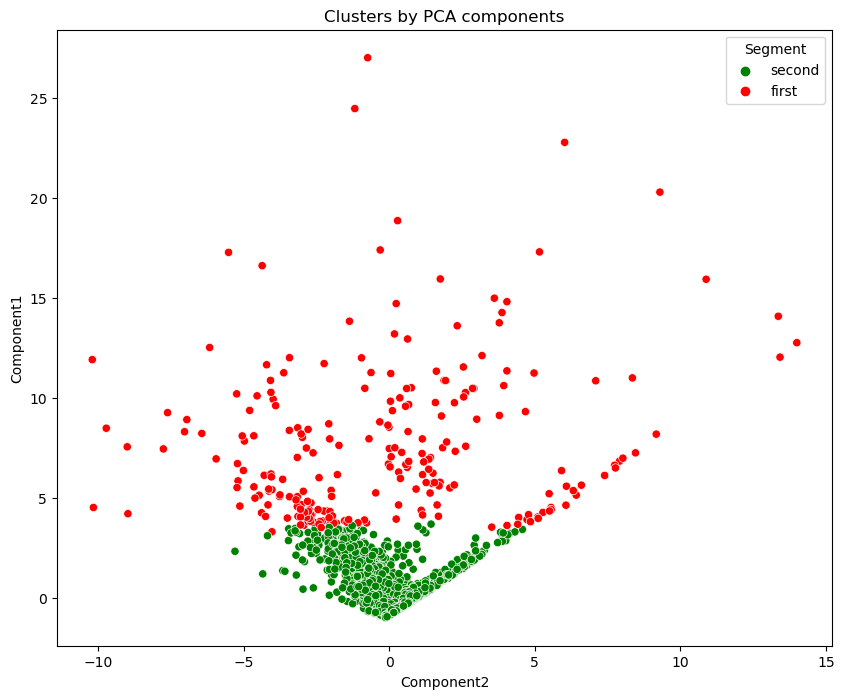

In [56]:
x_axis=df_segm_pca_kmeans_after['Component2']
y_axis=df_segm_pca_kmeans_after['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=df_segm_pca_kmeans_after['Segment'],palette=['g','r','c','m'])
plt.title('Clusters by PCA components')
plt.show()